<b><font size = 45>LEMBAR KERJA KELOMPOK 2 - PERSIAPAN DATA DAN TELAAH INFORMASI </font></b>

Kelompok: 

Nama anggota:

1. Fajar Buana Hidayat <br>
2. Adnan Al-farizi Rahmat <br>
3. Muhammad Ichsan Kamil <br>
4. Muhammad Ihsas Alvi Ibrahim <br>
5. Syarafina Dewi <br>

# Persiapan Data

Analisis data yang sudah dipilih dan apakah ada atribut yang memerlukan perubahan bentuk data agar menjadi lebih informatif? Adakah atribut yang masih mengandung nilai NaN? Adakah ada atribut yang tidak terpakai? Atau adakah perubahan bentuk data yang diperlukan? Apabila ada, silakan jelaskan bentuk transformasi data apa saja yang perlu dilakukan dan implementasikan proses tersebut menggunakan Python.

Terdapat atribut yang di ubah agar bentuk data menjadi lebih informatif. Pada dataset kami, terdapat 3 variabel kosong yang bernilai null. Sehingga, pada proses ini kami menghilangkan variabel yang tidak terpakai. Variable tersebut adalah 'Unnamed: 2','Unnamed: 3', dan 'Unnamed: 4'. Setelah itu, kami memeriksa apakah terdapat data 'null' (NaN) pada setiap baris dari kolom v1 dan v2. Setelah 'null' (NaN) pada setiap baris 0, maka dapat dilakukan proses pemilahan dari kolom 'label' untuk kategori spam atau ham.  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'spam.csv'
df_new = pd.read_csv(file_path, delimiter = ',', encoding = "ISO-8859-1")

df_new

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [2]:
#Menghilangkan variable yang tidak terpakai
df_new.drop(["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis=1, inplace=True)
display(df_new)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
#Mengganti nama kolom v1 dan v2 menjadi label dan email
df_new.rename(columns={'v1':'Label', 'v2':'Email'}, inplace=True)
df_new

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
#Deskripsi data email
print('Descriptive Statistics:\n', df_new.describe())

Descriptive Statistics:
        Label                   Email
count   5572                    5572
unique     2                    5169
top      ham  Sorry, I'll call later
freq    4825                      30


In [5]:
#Mengidentifikasi bentuk data dan jumlah data Nan
display(df_new)
display()
display(df_new.shape)
display()
df_new.isna().sum()

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


(5572, 2)

Label    0
Email    0
dtype: int64

In [6]:
#Memeriksa data duplikasi
df_new.duplicated().sum()

403

In [7]:
#Menghapus data duplikasi dan bentuk setelah mengahpus data duplikasi
df_new = df_new.drop_duplicates(keep='first')
display(df_new.head())
df_new.shape

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


(5169, 2)

In [8]:
df_new.dropna(axis = 0)
display(df_new)

,Label,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [9]:
#Transform label menjadi numeric
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_new['Label'] = le.fit_transform(df_new['Label'])

df_new.head()
#Ham = 0, Spam = 1

C:\Users\Ihsas\AppData\Local\Temp\ipykernel_604\2600314688.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['Label'] = le.fit_transform(df_new['Label'])


,Label,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
#Mengkategorikan data email mana yang masuk label ham dan spam
ham = df_new['Label'] == 0
display(df_new[ham])
print()
spam = df_new['Label'] == 1
display(df_new[spam])
print()

,Label,Email
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
6,0,Even my brother is not like to speak with me. ...
...,...,...
5565,0,Huh y lei...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


,Label,Email
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
5,1,FreeMsg Hey there darling it's been 3 week's n...
8,1,WINNER!! As a valued network customer you have...
9,1,Had your mobile 11 months or more? U R entitle...
11,1,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5537,1,Want explicit SEX in 30 secs? Ring 02073162414...
5540,1,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5547,1,Had your contract mobile 11 Mnths? Latest Moto...
5566,1,REMINDER FROM O2: To get 2.50 pounds free call...


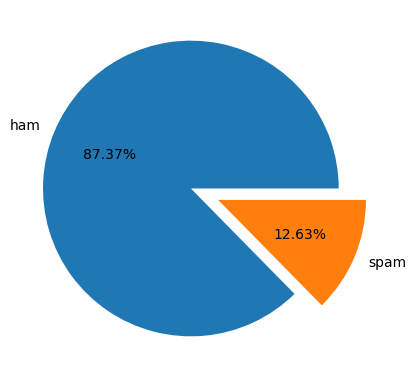

In [11]:
plt.pie(df_new['Label'].value_counts(), labels=['ham','spam'],autopct='%0.2f%%',explode=[0.1,0.1])
plt.show()

In [12]:
#Tokenization
# data is imbalaced
## Now we are going to do Analysis on No. of Characters, Words, and Sentences Used in every Message

import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def text_processing(text):
    text = nltk.word_tokenize(text.lower())
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            stemming = ps.stem(i)
            y.append(stemming)
            
    return " ".join(y)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Ihsas\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Ihsas\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Create a new column to store the clean data

df_new['Transformed_text'] = df_new['Email'].apply(text_processing)
df_new.head()

In [ ]:
# First of all We have to Convert Our Email text to Vectors Using Bag of Words Technique

from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer
vectorizer = CountVectorizer()

# Mengubah teks menjadi vektor Bow
X = vectorizer.fit_transform(df_new['Transformed_text'])

# View a list of words recognized by the vectorizer
feature_names = vectorizer.get_feature_names_out()

# Shows a BoW vector representation
print("Representasi vektor BoW:")
print(X.toarray())

# Displays a list of recognized words
print("Daftar kata:")
print(feature_names)

In [ ]:
#Make new variable y

y = np.array(df_new['Label'])
y

# Telaah Informasi

Sebutkan 5 informasi yang bisa dimunculkan dari data yang dipilih! Munculkan informasi tersebut menggunakan Python dan visualisasikan menggunakan bentuk visualisasi yang tepat!

Informasi yang di dapat setelah pemrosesan data sebagai berikut:
1. Terdapat 5572 data spam dan ham dalam 2 variabel yakni label dan email
2. Dari 5572 data tersebut, data label ham menjadi yang terbanyak yaitu terdapat 4825 data ham dan 747 data spam
3. Terdapat 403 data duplikat di antara label spam dan ham
4. Tiga kata kategori spam yang terbanyak muncul adalah 'call','free', dan 'txt'
5. Tiga kata kategori ham yang terbanyak muncul adalah 'u','go', dan 'get'

In [ ]:
display(df_new)

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def visualize(label):
    words = ''
    for txt in df_new[df_new['Label'] == label]['Email']:
        words = words + txt + ' '
        
    wordcloud = WordCloud(width=500,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

In [ ]:
visualize(1)

In [ ]:
visualize(0)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Converting Spam Messages to List of Words
x = df_new[df_new['Label'] == 1]['Transformed_text'].str.cat(sep= " ")
spam_msg_word_list = x.split()
len(spam_msg_word_list)

from collections import Counter
spam_top_30words = pd.DataFrame(Counter(spam_msg_word_list).most_common(30))

## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(x=spam_top_30words[0],y=spam_top_30words[1], data=spam_top_30words)
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

## Converting ham Messages to List of Words
x = df_new[df_new['Label'] == 0]['Transformed_text'].str.cat(sep= " ")
ham_msg_word_list = x.split()
len(ham_msg_word_list)

from collections import Counter
ham_top_30words = pd.DataFrame(Counter(ham_msg_word_list).most_common(30))

## Visualising it on the Bar Plot
plt.figure(figsize=(10,8))
sns.barplot(x=ham_top_30words[0],y=ham_top_30words[1], data=ham_top_30words)
plt.xticks(rotation='vertical')
plt.show()